<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9758116	total: 50.7ms	remaining: 50.6s
1:	learn: 0.9433253	total: 51ms	remaining: 25.5s
2:	learn: 0.9158279	total: 51.5ms	remaining: 17.1s
3:	learn: 0.8847828	total: 52ms	remaining: 12.9s
4:	learn: 0.8549543	total: 52.4ms	remaining: 10.4s
5:	learn: 0.8308966	total: 52.7ms	remaining: 8.73s
6:	learn: 0.8059574	total: 53.1ms	remaining: 7.53s
7:	learn: 0.7798948	total: 53.5ms	remaining: 6.63s
8:	learn: 0.7540553	total: 53.9ms	remaining: 5.93s
9:	learn: 0.7303598	total: 54.4ms	remaining: 5.38s
10:	learn: 0.7087763	total: 54.9ms	remaining: 4.93s
11:	learn: 0.6883775	total: 55.2ms	remaining: 4.55s
12:	learn: 0.6682524	total: 55.7ms	remaining: 4.23s
13:	learn: 0.6479250	total: 56.2ms	remaining: 3.96s
14:	learn: 0.6276696	total: 56.9ms	remaining: 3.74s
15:	learn: 0.6076357	total: 57.2ms	remaining: 3.52s
16:	learn: 0.5886680	total: 57.7ms	remaining: 3.34s
17:	learn: 0.5711831	total: 58.1ms	remaining: 3.17s
18:	learn: 0.5571710	total: 58.4ms	remaining: 3.01s
19:	learn: 0.5393218	total

193:	learn: 0.0412433	total: 151ms	remaining: 632ms
194:	learn: 0.0411090	total: 158ms	remaining: 654ms
195:	learn: 0.0409640	total: 160ms	remaining: 661ms
196:	learn: 0.0408854	total: 162ms	remaining: 663ms
197:	learn: 0.0407572	total: 162ms	remaining: 661ms
198:	learn: 0.0406847	total: 163ms	remaining: 658ms
199:	learn: 0.0405207	total: 163ms	remaining: 655ms
200:	learn: 0.0404350	total: 163ms	remaining: 652ms
201:	learn: 0.0403151	total: 163ms	remaining: 649ms
202:	learn: 0.0400666	total: 164ms	remaining: 646ms
203:	learn: 0.0398260	total: 164ms	remaining: 644ms
204:	learn: 0.0397443	total: 170ms	remaining: 664ms
205:	learn: 0.0396524	total: 176ms	remaining: 682ms
206:	learn: 0.0394074	total: 177ms	remaining: 680ms
207:	learn: 0.0392518	total: 179ms	remaining: 685ms
208:	learn: 0.0391185	total: 180ms	remaining: 684ms
209:	learn: 0.0389016	total: 180ms	remaining: 682ms
210:	learn: 0.0387934	total: 181ms	remaining: 681ms
211:	learn: 0.0386853	total: 182ms	remaining: 681ms
212:	learn: 

270:	learn: 0.0327678	total: 253ms	remaining: 682ms
271:	learn: 0.0326994	total: 255ms	remaining: 686ms
272:	learn: 0.0326497	total: 258ms	remaining: 689ms
273:	learn: 0.0325928	total: 259ms	remaining: 688ms
274:	learn: 0.0325534	total: 260ms	remaining: 687ms
275:	learn: 0.0324706	total: 261ms	remaining: 686ms
276:	learn: 0.0322729	total: 262ms	remaining: 687ms
277:	learn: 0.0321285	total: 263ms	remaining: 686ms
278:	learn: 0.0319917	total: 264ms	remaining: 685ms
279:	learn: 0.0318619	total: 266ms	remaining: 686ms
280:	learn: 0.0318076	total: 267ms	remaining: 685ms
281:	learn: 0.0317409	total: 268ms	remaining: 684ms
282:	learn: 0.0316502	total: 269ms	remaining: 683ms
283:	learn: 0.0315834	total: 270ms	remaining: 683ms
284:	learn: 0.0315094	total: 271ms	remaining: 683ms
285:	learn: 0.0313795	total: 277ms	remaining: 694ms
286:	learn: 0.0313437	total: 278ms	remaining: 694ms
287:	learn: 0.0312055	total: 280ms	remaining: 694ms
288:	learn: 0.0311560	total: 281ms	remaining: 693ms
289:	learn: 

337:	learn: 0.0275172	total: 357ms	remaining: 702ms
338:	learn: 0.0274459	total: 373ms	remaining: 729ms
339:	learn: 0.0274233	total: 374ms	remaining: 728ms
340:	learn: 0.0273672	total: 376ms	remaining: 728ms
341:	learn: 0.0273117	total: 379ms	remaining: 731ms
342:	learn: 0.0272550	total: 380ms	remaining: 729ms
343:	learn: 0.0272043	total: 381ms	remaining: 728ms
344:	learn: 0.0271553	total: 381ms	remaining: 726ms
345:	learn: 0.0271011	total: 382ms	remaining: 724ms
346:	learn: 0.0270495	total: 383ms	remaining: 723ms
347:	learn: 0.0269986	total: 385ms	remaining: 723ms
348:	learn: 0.0269464	total: 388ms	remaining: 725ms
349:	learn: 0.0268897	total: 388ms	remaining: 723ms
350:	learn: 0.0268414	total: 391ms	remaining: 725ms
351:	learn: 0.0268052	total: 393ms	remaining: 725ms
352:	learn: 0.0267420	total: 399ms	remaining: 734ms
353:	learn: 0.0267034	total: 400ms	remaining: 732ms
354:	learn: 0.0266739	total: 404ms	remaining: 737ms
355:	learn: 0.0266173	total: 405ms	remaining: 735ms
356:	learn: 

417:	learn: 0.0237759	total: 489ms	remaining: 683ms
418:	learn: 0.0237207	total: 496ms	remaining: 689ms
419:	learn: 0.0236878	total: 497ms	remaining: 688ms
420:	learn: 0.0236460	total: 497ms	remaining: 685ms
421:	learn: 0.0236213	total: 497ms	remaining: 683ms
422:	learn: 0.0235886	total: 498ms	remaining: 680ms
423:	learn: 0.0235419	total: 498ms	remaining: 678ms
424:	learn: 0.0234864	total: 503ms	remaining: 682ms
425:	learn: 0.0234689	total: 504ms	remaining: 681ms
426:	learn: 0.0234250	total: 504ms	remaining: 678ms
427:	learn: 0.0233756	total: 505ms	remaining: 677ms
428:	learn: 0.0233289	total: 506ms	remaining: 675ms
429:	learn: 0.0232872	total: 508ms	remaining: 675ms
430:	learn: 0.0232552	total: 512ms	remaining: 678ms
431:	learn: 0.0232413	total: 513ms	remaining: 676ms
432:	learn: 0.0232029	total: 514ms	remaining: 675ms
433:	learn: 0.0231622	total: 516ms	remaining: 675ms
434:	learn: 0.0231228	total: 517ms	remaining: 674ms
435:	learn: 0.0230679	total: 521ms	remaining: 675ms
436:	learn: 

525:	learn: 0.0202835	total: 614ms	remaining: 554ms
526:	learn: 0.0202692	total: 615ms	remaining: 553ms
527:	learn: 0.0202478	total: 616ms	remaining: 552ms
528:	learn: 0.0202333	total: 616ms	remaining: 550ms
529:	learn: 0.0202021	total: 618ms	remaining: 549ms
530:	learn: 0.0201756	total: 619ms	remaining: 548ms
531:	learn: 0.0201585	total: 620ms	remaining: 547ms
532:	learn: 0.0201299	total: 621ms	remaining: 545ms
533:	learn: 0.0201025	total: 622ms	remaining: 544ms
534:	learn: 0.0200770	total: 623ms	remaining: 542ms
535:	learn: 0.0200497	total: 624ms	remaining: 542ms
536:	learn: 0.0200222	total: 626ms	remaining: 540ms
537:	learn: 0.0199943	total: 627ms	remaining: 539ms
538:	learn: 0.0199693	total: 627ms	remaining: 537ms
539:	learn: 0.0199428	total: 629ms	remaining: 536ms
540:	learn: 0.0199220	total: 637ms	remaining: 541ms
541:	learn: 0.0198960	total: 637ms	remaining: 539ms
542:	learn: 0.0198732	total: 637ms	remaining: 537ms
543:	learn: 0.0198505	total: 638ms	remaining: 535ms
544:	learn: 

634:	learn: 0.0180768	total: 746ms	remaining: 430ms
635:	learn: 0.0180490	total: 749ms	remaining: 429ms
636:	learn: 0.0180216	total: 751ms	remaining: 429ms
637:	learn: 0.0180075	total: 753ms	remaining: 428ms
638:	learn: 0.0179953	total: 755ms	remaining: 427ms
639:	learn: 0.0179669	total: 758ms	remaining: 427ms
640:	learn: 0.0179356	total: 758ms	remaining: 425ms
641:	learn: 0.0179166	total: 765ms	remaining: 427ms
642:	learn: 0.0178912	total: 766ms	remaining: 426ms
643:	learn: 0.0178830	total: 766ms	remaining: 424ms
644:	learn: 0.0178563	total: 767ms	remaining: 423ms
645:	learn: 0.0178340	total: 767ms	remaining: 421ms
646:	learn: 0.0178261	total: 768ms	remaining: 420ms
647:	learn: 0.0178175	total: 769ms	remaining: 418ms
648:	learn: 0.0177954	total: 769ms	remaining: 417ms
649:	learn: 0.0177775	total: 770ms	remaining: 415ms
650:	learn: 0.0177698	total: 771ms	remaining: 414ms
651:	learn: 0.0177511	total: 771ms	remaining: 412ms
652:	learn: 0.0177465	total: 772ms	remaining: 411ms
653:	learn: 

780:	learn: 0.0156982	total: 873ms	remaining: 245ms
781:	learn: 0.0156841	total: 873ms	remaining: 244ms
782:	learn: 0.0156726	total: 874ms	remaining: 242ms
783:	learn: 0.0156605	total: 879ms	remaining: 242ms
784:	learn: 0.0156506	total: 879ms	remaining: 241ms
785:	learn: 0.0156419	total: 880ms	remaining: 240ms
786:	learn: 0.0156294	total: 880ms	remaining: 239ms
787:	learn: 0.0155745	total: 881ms	remaining: 237ms
788:	learn: 0.0155604	total: 881ms	remaining: 236ms
789:	learn: 0.0155468	total: 882ms	remaining: 235ms
790:	learn: 0.0155334	total: 882ms	remaining: 233ms
791:	learn: 0.0155239	total: 883ms	remaining: 232ms
792:	learn: 0.0155155	total: 883ms	remaining: 231ms
793:	learn: 0.0154821	total: 884ms	remaining: 230ms
794:	learn: 0.0154703	total: 885ms	remaining: 228ms
795:	learn: 0.0154642	total: 885ms	remaining: 227ms
796:	learn: 0.0154276	total: 886ms	remaining: 226ms
797:	learn: 0.0154214	total: 886ms	remaining: 225ms
798:	learn: 0.0154078	total: 887ms	remaining: 223ms
799:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.020698996792348368
ABC Pre-generator MAE 1.0181163658562653


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

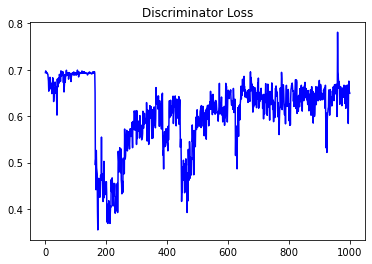

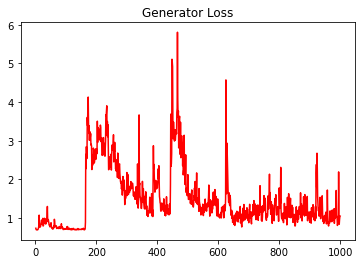

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.04635496548534214


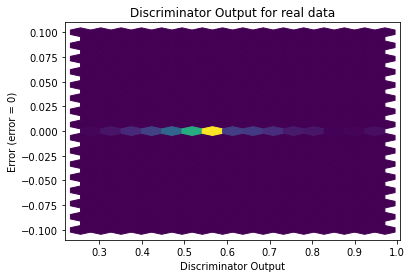

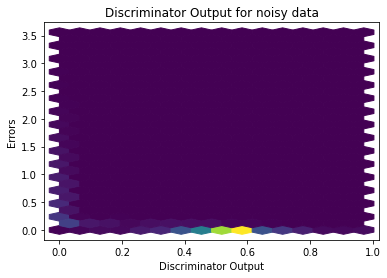

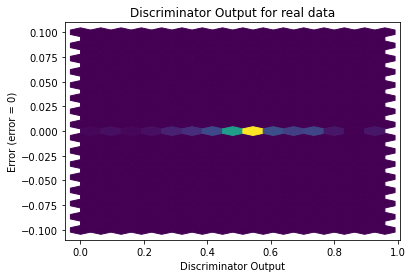

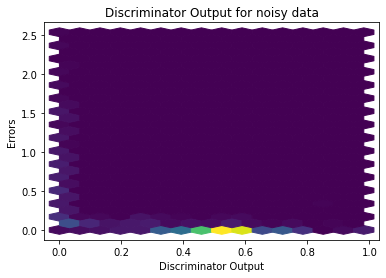

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())